

# Project Python Foundations: FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [125]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore') 

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns



### Understanding the structure of the data

In [126]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that. (0.5 mark)

In [127]:
df.shape

(1898, 9)

#### Observations:
This data set have 1898 rows and 9 columns.


### Question 2: Write the observations based on the below output from the info() method. (0.5 mark)

In [128]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
    There are no null values therefore imputation is not required.
    cost_of_the_order is the one with float type variable
    order_id, customer_id, food_preparation_time, delivery_time are the four integer type features
    restaurant_name, cuisine_type, day of the week and rating are the four object type attributes.




### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same. (0.5 mark)

In [129]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data

# use info() to print a concise summary of the DataFrame
df.restaurant_name = df.restaurant_name.astype('category')
df.cuisine_type = df.cuisine_type.astype('category')
df.day_of_the_week = df.day_of_the_week.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:
memory usage: 133.6+ KB is reduced to memory usage: 102.7+ KB

the data type restaurant_name, cuisine_type, and day_of_the_week is converted into category.

the column name 'rating' is object type which can not be changed directly into category because ratings have some string values in it. 


### **Question 4:** Write the code to find the summary statistics and write your observations based on that. (1 mark)

In [130]:
df.describe(). T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations: We don't need statistic of id's. Here, we don't need statistics of order_id, customer_id

the average cost of the order is 1.649885e+01 ~  16.49, 𝑚𝑖𝑛 𝑜𝑟𝑑𝑒𝑟 𝑖𝑠 𝑜𝑓 4.47, maximum order is of  35.4125, 75% of the values lies below 1.649885e+01 ~  16.49𝑎𝑛𝑑𝑡ℎ𝑒𝑚𝑒𝑑𝑖𝑎𝑛𝑜𝑓𝑡ℎ𝑒𝑐𝑜𝑠𝑡𝑜𝑓𝑡ℎ𝑒𝑜𝑟𝑑𝑒𝑟𝑖𝑠 14.14 Here mean (16.49)> then median(14.14) therefore we can guess that the outliers lies to the right of the graph. Standard deviation in the cost price is 7.483812 which means that the cost price of the order deviates by around m 7.48 around the mean cost price

In average the food preparation time is 2.737197e+01 ~ 27.37, median is 27 mins. Which implies that there are no outliers. There are less or no food items that require extremely huge amount of time , maximum time required is 35 minutes, minimum is 20 mins and usually time to prepare food differs by 4.632 mins . Standard deviation for food preparation time is 4.632 mins.

For delivery time, the average time taken is 2.737197e+01 ~ 27.37 mins, the median is 25 minutes. here mean is less then mdian therefore we might have some outliers in the data and the data is most probably skewd to the left. the min time takes is 20 mins that maximum time taken is 33 mins. The average time taken for delivery deviates by 4.97 mins.


### **Question 5:** How many orders are not rated? (0.5 mark)

In [131]:
df.rating.value_counts()['Not given']

736

#### Observations:  
There are 736 values in columns rating which is not rated in other words Not given.

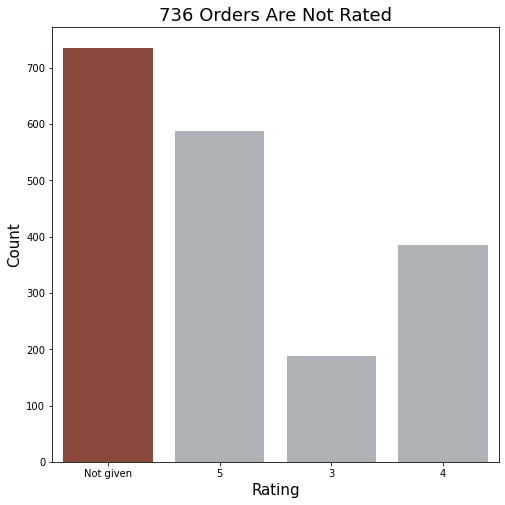

In [132]:
plt.figure(figsize=(8, 8))
sns.countplot(x='rating', data = df, palette=["#97412E", "#ABB2B9", "#ABB2B9", "#ABB2B9"])
plt.xlabel('Rating', size= 15)
plt.ylabel('Count', size= 15)
plt.title('736 Orders Are Not Rated', size=18)
plt.show()

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (5 marks)

# Univariate Analysis of cuisine_type(categorical datatype)

<Figure size 7200x7200 with 0 Axes>

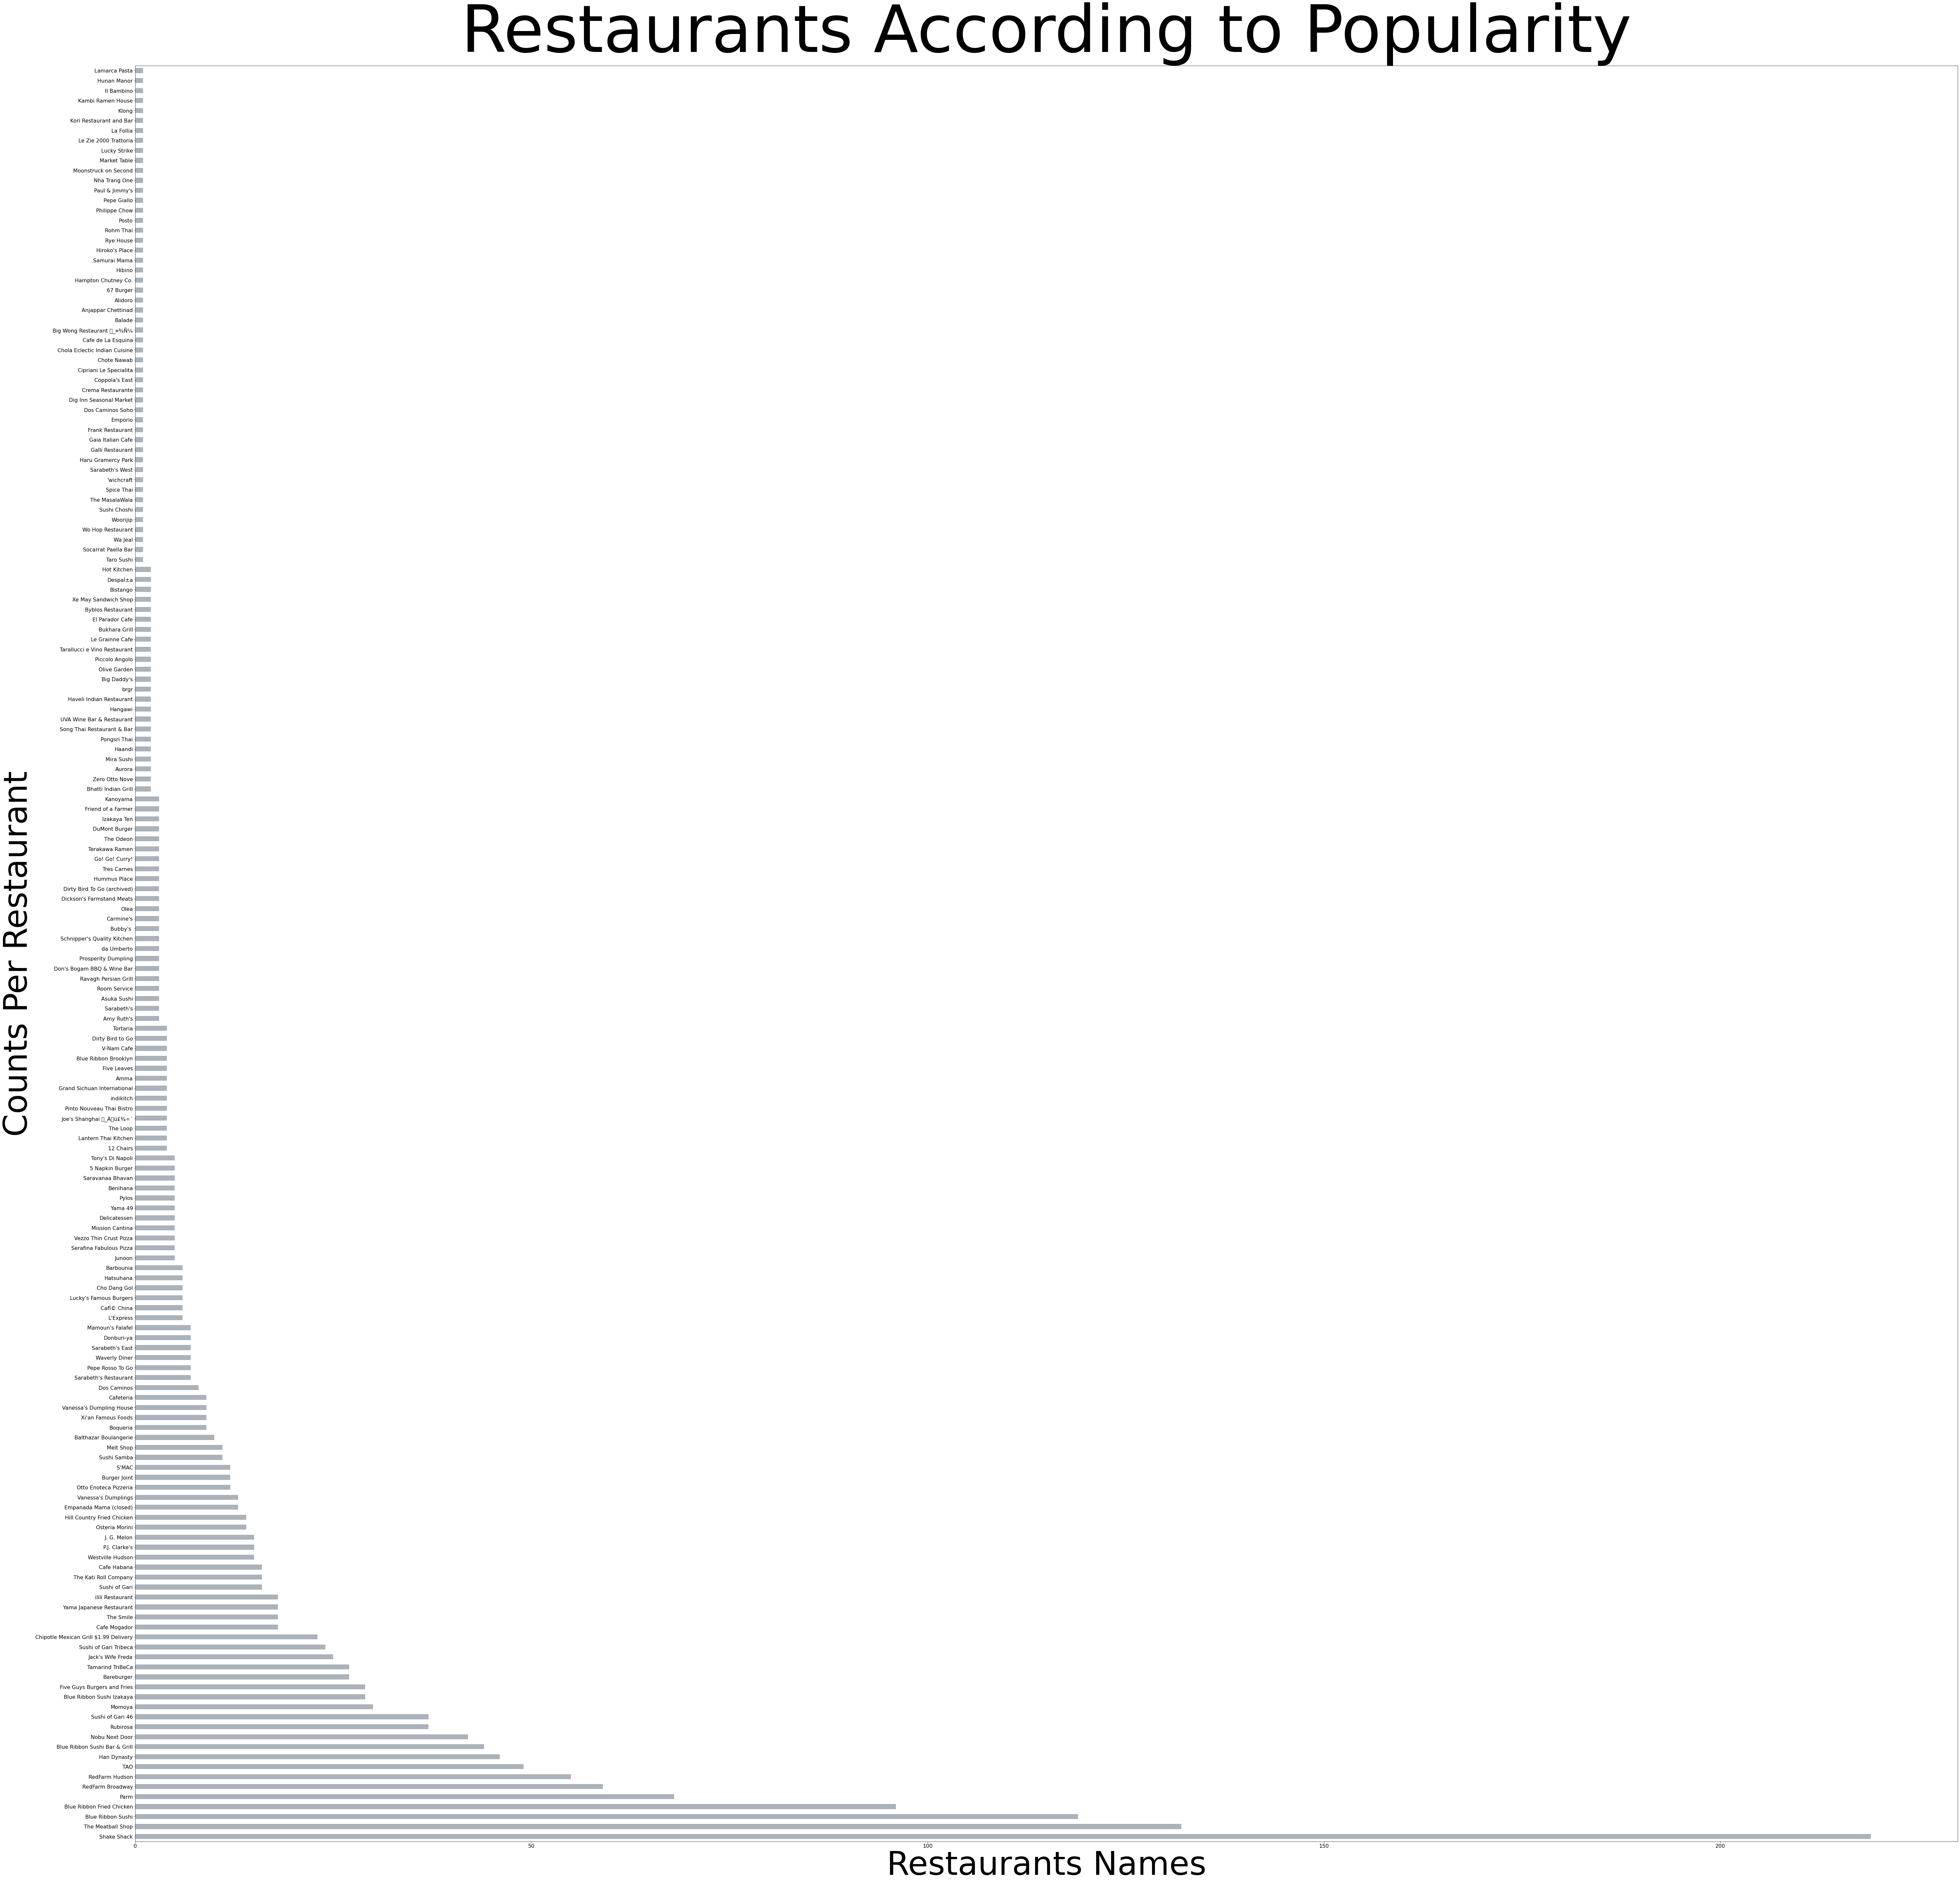

In [133]:
# plot the bar plot 
plt.figure(figsize=(100,100))

#df['restaurant_name'].value_counts().plot(kind='bar',color='green',figsize=(120, 30))
#plt.xlabel('Restaurant name')
#plt.ylabel('Counts Per restaurant')
#plt.title('restaurants with total orders')
#plt.show()
plt.figure(figsize=(100,100))
df["restaurant_name"].value_counts() .plot(kind="barh", color="#ABB2B9", fontsize=16)
plt.xlabel('Restaurants Names', size = 100)
plt.ylabel('Counts Per Restaurant', size = 100)
plt.title('Restaurants According to Popularity', Size=200)
plt.show()
#🙋‍♀️ Question- How do I color Red to American Cuisine only.


In [134]:
Observation
   Shake shack is the Most poular restaurant according to the data. 
   

IndentationError: unexpected indent (3661360117.py, line 2)

In [ ]:
plt.figure(figsize=(10,5))
df["cuisine_type"].value_counts().plot(kind="bar", title="Popular Cuisine", 
                                 rot=90, fontsize=10, color="#B58923")
plt.xlabel('Cuisine Type', size = 15)
plt.ylabel('Count', size = 15)
plt.title('Cusine Type According to Popularity', Size= 18)
plt.show()

Observation:
American is the most popular cuisine.
Thai, French, Southern, korean, spanish and vietnamese the least popular cuisine. 
FoodHub can make revenue from these least popular cuisine offering restaruants by offering promotional and marketing packages. 

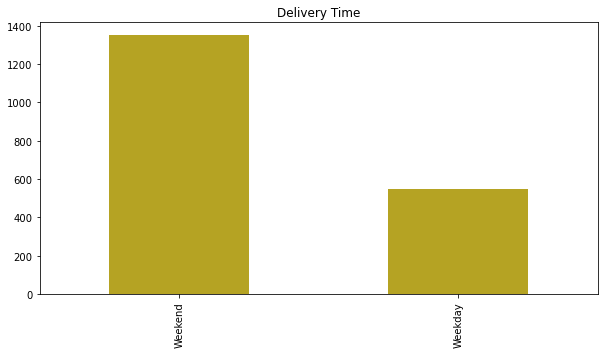

In [135]:
df["day_of_the_week"].value_counts().plot(kind="bar", title="Delivery Time", figsize=(10, 5), color="#B5A323")
plt.show()

There are more deliveries in the weekend then weekday.


# univariate analysis of (continuous datatype)

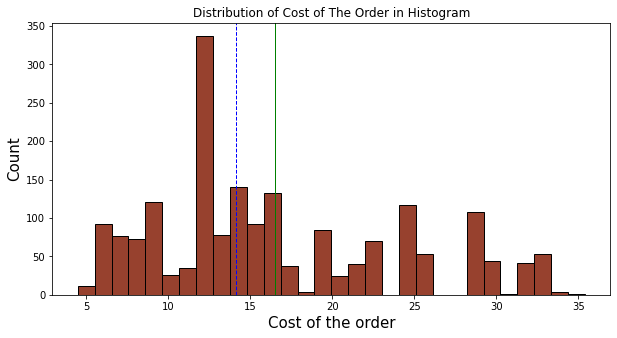

In [136]:

fig, ax = plt.subplots(figsize=(10, 5)) # subplots returns fig and axis
ax.hist(df['cost_of_the_order'], color = '#97412E', edgecolor='black', bins = 30, ) # create bins = 30
plt.axvline(df['cost_of_the_order'].mean(), color='g', linewidth=1)
plt.axvline(df['cost_of_the_order'].median(), color='b', linestyle='dashed', linewidth=1)
#plt.axvline(df['cost_of_the_order'].mode()[0], color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Cost Of The Order', size=15)
plt.ylabel('Count', size=15)
plt.legend
ax.set(xlabel="Cost of the order", title='Distribution of Cost of The Order in Histogram')
plt.show()
#🙋‍♀️legend

Observation- 
The cost of a order is spreaded from around 5 to around 35 dollars.
Mostly around 13 dollars is spend in a order
In average around 17 dollars is spent. 
Most of the outliers are toward the right of the graph.

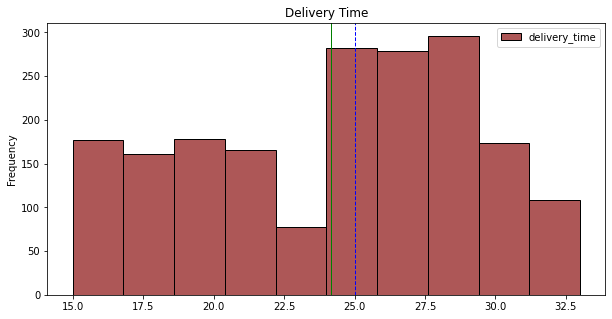

In [137]:
#fig, ax = plt.subplots() # subplots returns fig and axis
#ax.hist(df['delivery_time'], color = 'g', edgecolor='black', bins = 30) # create bins = 30
#ax.set(xlabel="Delivery Time", title="Histogram")
plt.figure(figsize=(10,5))
plt.axvline(df['delivery_time'].mean(), color='green', linewidth=1)
plt.axvline(df['delivery_time'].median(), color='b', linestyle='dashed', linewidth=1)
df["delivery_time"].plot(kind="hist", color="#AD5757", edgecolor='black', title="Delivery Time", legend=True,)
plt.show()



Observation

Observation- 
    delivery time can take from 15 to 33 minutes but unseen circumstances can hindrance the normal delivery time
    In average it can take around 15 minutes.
    Few Outliers are present which are causing average time to be more then median time.

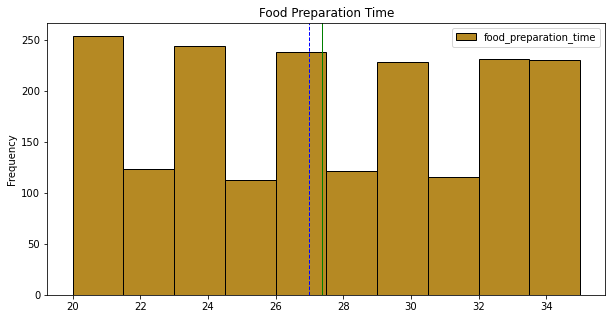

In [138]:
# fig, ax = plt.subplots(figsize=(10, 5)) # subplots returns fig and axis
plt.figure(figsize=(10,5))
plt.axvline(df['food_preparation_time'].mean(), color='green', linewidth=1)
plt.axvline(df['food_preparation_time'].median(), color='b', linestyle='dashed', linewidth=1)
df["food_preparation_time"].plot(kind="hist", color="#B58923", edgecolor='black', title="Food Preparation Time", legend=True,)
plt.show()


Observation-
      Time can range from 20 to 35 for preparation of an order.
      Mean and Median are very close but still mean is greater than median stating the presence of few outliers.
      

# Bivariate Analysis

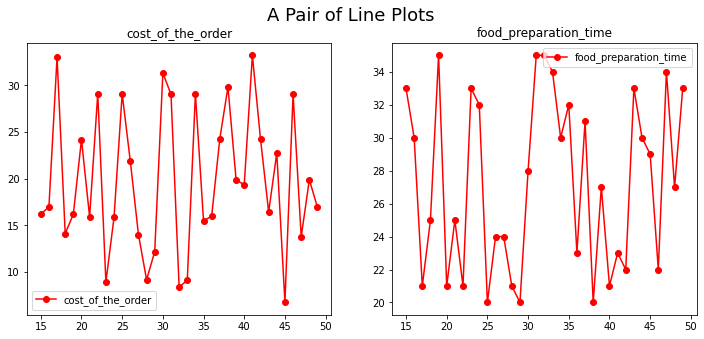

In [139]:
df[15:50].plot(kind="line",  y=["cost_of_the_order", "food_preparation_time"], style=['r-o', 'r-o'],
             figsize=(12,5), title=["cost_of_the_order", "food_preparation_time"],
             subplots=True, layout=(1,2)) 
# Set the title of the whole figure
plt.suptitle("A Pair of Line Plots",size=18)
plt.show()

In [140]:
Observation- 

SyntaxError: invalid syntax (4280239769.py, line 1)

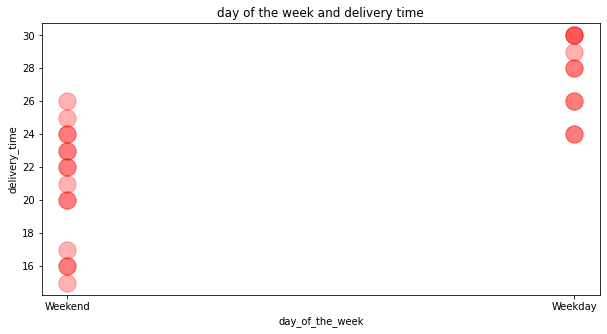

In [141]:
df[:25].plot(kind="scatter", x="day_of_the_week", y="delivery_time", 
             title="day of the week and delivery time", s=300, color="red", alpha=.3, figsize=(10, 5))
plt.show()

observation:
    Delivery time taken on weekday is more than that of weekend
    

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders. (1 mark)

df.groupby(by='restaurant_name')['cost_of_the_order'].sum().sort_values(ascending = False).reset_index()


In [142]:
df.restaurant_name.value_counts().reset_index().head(5)

,index,restaurant_name
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations:
Shake shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm are the top 5 restaurants that received the highest number of orders

<AxesSubplot:>

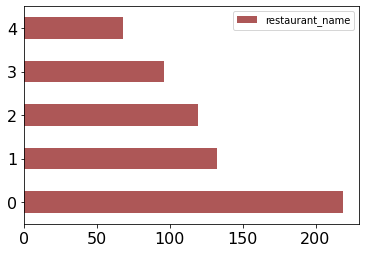

In [143]:
df.restaurant_name.value_counts().reset_index().head(5).plot(kind="barh", color="#AD5757", fontsize=16)

### Question 8: Write the code to find the most popular cuisine on weekends. (1 mark)

In [144]:
df.groupby(by='day_of_the_week')['cuisine_type'].value_counts()

#df.groupby(by='restaurant_name')['cost_of_the_order'].sum().sort_values(ascending = False).reset_index()


day_of_the_week                
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

#### Observations:
American cuisine is the most popular on the weekends.

### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

In [145]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [146]:
df[df['cost_of_the_order']>20].count()['order_id']

555

In [147]:
x = df[df['cost_of_the_order']>20] 

In [148]:
len(x)

555

In [149]:
len(df)

1898

In [150]:
len(x)/len(df)*100     

29.24130663856691

#### Observations:


The number of total orders where the cost is above 20 dollars is 29.24%

### Question 10: Write the code to find the mean delivery time based on this dataset. (1 mark)

In [151]:
df.delivery_time.mean()

24.161749209694417

In [152]:
The mean delivery time is 24.1617 min.

SyntaxError: invalid syntax (1595657440.py, line 1)

#### Observations:
The mean delivery time is 24.1617


### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [153]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [154]:
df[df['cost_of_the_order']==df['cost_of_the_order'].max()]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29


In [155]:
df[df['cost_of_the_order']==df['cost_of_the_order'].max()]['order_id']

573    1477814
Name: order_id, dtype: int64

#### Observations:
The customer who has spent maximum amount of single order is with order id 1477814. customer id with  

### Multivariate Analysis

### Question 12: Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset. (7 marks)

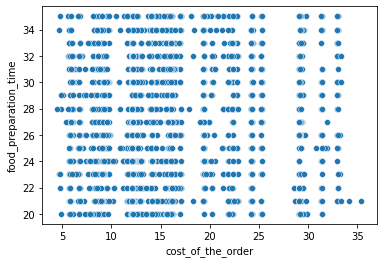

In [156]:
sns.scatterplot(df['cost_of_the_order'], df['food_preparation_time']) 
plt.show()

observation-food preparation time and and cost of the order are not related at all.

sometimes high cost of a order can implement bigger amount of order but as per the dataset there is no co-relation between food preparation time and cost of the order.

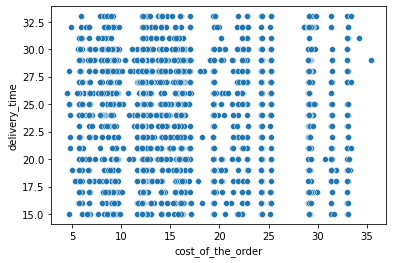

In [157]:
sns.scatterplot(df['cost_of_the_order'], df['delivery_time']) 
plt.show()

Observation- delivery time and cost of the order are not related 

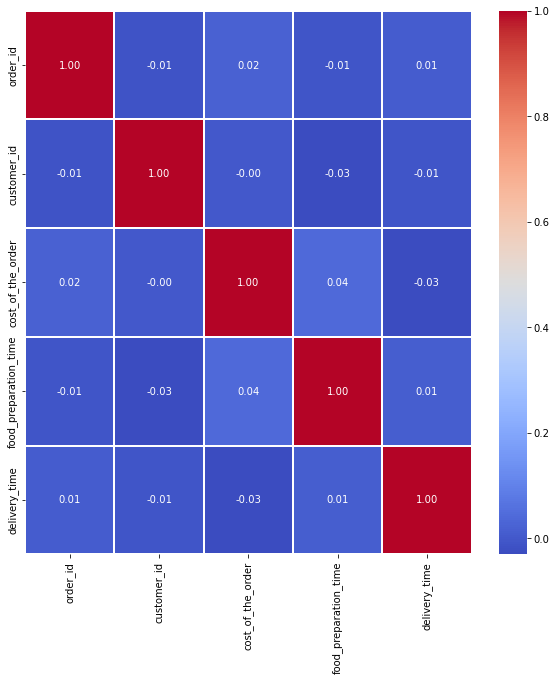

In [158]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="coolwarm") # the color intensity is based on 
plt.show()

Observation- There is no co-relation among the variables.

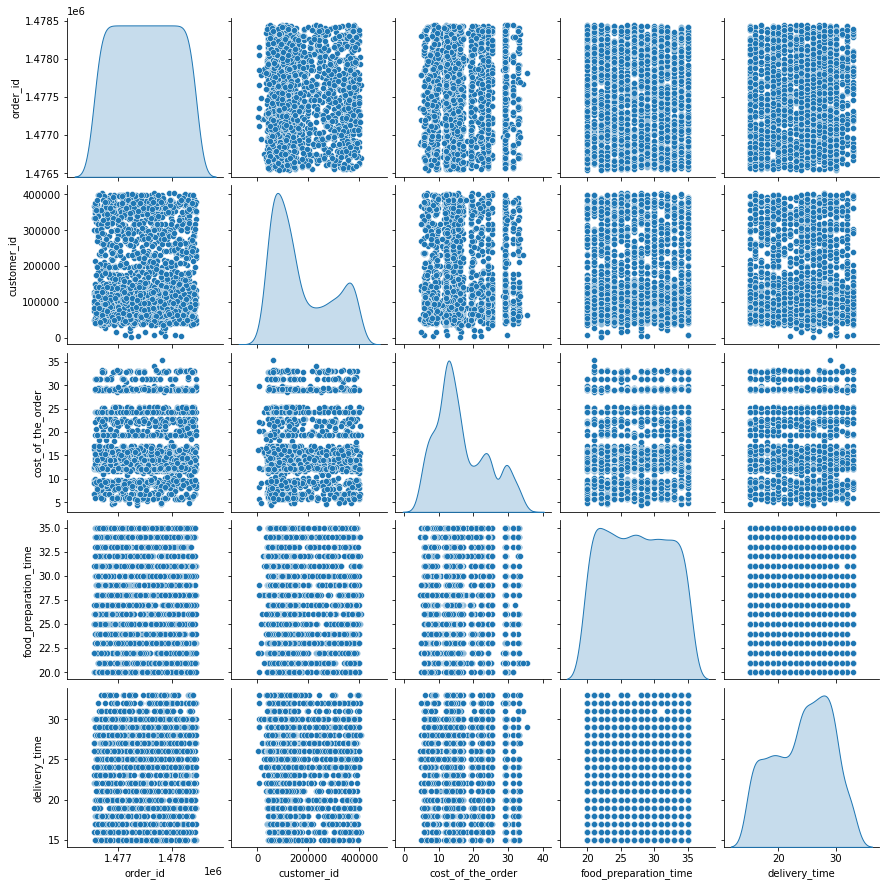

In [159]:
sns.pairplot(df, diag_kind="kde",)
plt.show()

There is no co relation among the variables cost_of_the_order, food_preparation_time and delivery time.

### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

In [160]:
df_rated = df[df['rating']!= 'Not given'].copy() #.copy avoids changes in original dataset
df_rated

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


In [161]:
df_rated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1162 non-null   int64   
 1   customer_id            1162 non-null   int64   
 2   restaurant_name        1162 non-null   category
 3   cuisine_type           1162 non-null   category
 4   cost_of_the_order      1162 non-null   float64 
 5   day_of_the_week        1162 non-null   category
 6   rating                 1162 non-null   object  
 7   food_preparation_time  1162 non-null   int64   
 8   delivery_time          1162 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 74.3+ KB


In [162]:
df_rated['rating'] = df_rated['rating'].astype('int64')


In [163]:
df_rated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1162 non-null   int64   
 1   customer_id            1162 non-null   int64   
 2   restaurant_name        1162 non-null   category
 3   cuisine_type           1162 non-null   category
 4   cost_of_the_order      1162 non-null   float64 
 5   day_of_the_week        1162 non-null   category
 6   rating                 1162 non-null   int64   
 7   food_preparation_time  1162 non-null   int64   
 8   delivery_time          1162 non-null   int64   
dtypes: category(3), float64(1), int64(5)
memory usage: 74.3 KB


In [164]:
df['restaurant_name'].value_counts() #value_counts give number of occurance of the value.

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Klong                          1
Kambi Ramen House              1
Il Bambino                     1
Hunan Manor                    1
Lamarca Pasta                  1
Name: restaurant_name, Length: 178, dtype: int64

In [165]:
df_restaurantcount = df.groupby(by='restaurant_name')['rating'].count().sort_values(ascending=False).reset_index() #use .reset_index to line up everything properly as we are creating new dataset
df_restaurantcount = df_restaurantcount.rename(columns=({'rating':'res_count'}))#rescount appeared as rating before column rating was renamed. Too avoid confusin, it was named
df_restaurantcount


,restaurant_name,res_count
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68
...,...,...
173,Klong,1
174,Kambi Ramen House,1
175,Il Bambino,1
176,Hunan Manor,1


In [166]:
df_resname = df_restaurantcount[df_restaurantcount['res_count']>50]
df_resname

,restaurant_name,res_count
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68
5,RedFarm Broadway,59
6,RedFarm Hudson,55


In [167]:
resname = df_resname['restaurant_name']
resname

0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
4                         Parm
5             RedFarm Broadway
6               RedFarm Hudson
Name: restaurant_name, dtype: category
Categories (178, object): [''wichcraft', '12 Chairs', '5 Napkin Burger', '67 Burger', ..., 'brgr', 'da Umberto', 'ilili Restaurant', 'indikitch']

In [168]:
df_rated_g4 = df_rated[df_rated['restaurant_name'].isin(resname)]

In [169]:
df_rated_g4

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
15,1477414,66222,Shake Shack,American,16.20,Weekend,5,33,25
18,1477138,47280,RedFarm Hudson,Chinese,14.12,Weekend,4,25,24
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26
...,...,...,...,...,...,...,...,...,...
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
1886,1478277,48282,The Meatball Shop,American,14.50,Weekend,5,34,25
1888,1477353,106324,The Meatball Shop,Italian,16.20,Weekend,5,21,26


In [170]:
df_rated_g4.groupby(by='restaurant_name')['rating'].mean().sort_values(ascending = False).reset_index().head()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,RedFarm Broadway,4.243902
4,Blue Ribbon Sushi,4.219178


In [171]:
df_rated_g4.groupby(by='restaurant_name')['rating'].mean().sort_values(ascending = False).reset_index().head().plot

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,RedFarm Broadway,4.243902
4,Blue Ribbon Sushi,4.219178


#### Observations:


### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

In [172]:


df['net_revenue'] = df['cost_of_the_order'].apply(lambda x: 25/100* x if x > 20 else 15/100* x)

def detNetReveue(x):
    if x > 20: 
        return 25/100* x
    else:
        return 15/100* x
    

df['net_revenue'] = df['cost_of_the_order'].apply(lambda x:  )

#### Observations:


In [346]:
df = df.drop(['net_revenue_one', 'net_revenue_two'], axis=1)

In [386]:
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,net_revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,5.5775
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,1.8270
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,6.3050
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,1.8270


### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [288]:
df['total_time'] = df['delivery_time']+ df['food_preparation_time']

In [291]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [305]:
delivery60 = df[df['total_time']>60].count()['total_time']
delivery60 

200

In [307]:
delivery60/df.shape[0]*100

10.537407797681771

#### Observations:
percentage of order that took more than 60 min is 10.537%

### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [340]:
df.groupby(by='day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

observation:
        the average time required during weekday is 28.34 minutes and the average time required on weekend is 22.47 minutes.

### Conclusion and Recommendations

### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (3 marks)

#### Key Insights: 
food hub has many unpopular restaurants than the popular ones. More income can be generated if more promotion packages are offered to less popular restaurants. 

The food hub receives less orders on the weekdays. There is some more scope to get more orders in the weekdays.